In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
#nltk.download('wordnet')
from nltk.stem import PorterStemmer
from tqdm import tqdm

In [2]:
#import spacy

In [3]:
personas_data = pickle.load(open("Data/characters_personas_data.pickle", "rb")) # SHOULD BE IN FOLDER PICKLE SO TO MODIFY!

In [4]:
display(personas_data)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[century, film, miners, miners, battles, events]","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0,"[terraformed, allowing, become, authority, sen...","[matriarchal, police, second, second, small, s...","[film, depicts, positions, story, concerns, of...","[(film, NN), (depicts, NNS), (Mars, NNP), (84,..."
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0,"[wearing, become, named, named, held, mining, ...","[transport, remote, ancient, horrific, team, d...","[pressure, suits, society, prisoner, prisoner,...","[(wearing, VBG), (pressure, NN), (suits, NNS),..."
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans..."
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, officers, operator...","[(pick, NN), (transport, NN), (prisoner, NN), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0,"[make, regarding]",[new],"[husband, decision]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),..."
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0,"[murdered, regarding, make, regarding]","[new, niece]","[sister, brother, law, husband, husband, decis...","[[(Holden, NNP)], (sister, NN), (brother, NN),..."
336455,336456,NaN,NaN,NaN,joshua bootz,NaN,tt9914522,Evan's dad,M,NaN,The Holden Family Plan,2019.0,NaN,"[make, regarding, regarding]",[new],"[husband, decision, make, niece]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),..."
336456,336457,NaN,NaN,NaN,vince camaj,NaN,tt9914522,Todd,M,NaN,The Holden Family Plan,2019.0,NaN,[],[],[],[]


In [5]:
# we drop the characters that have no words associated to them -  they do not appear in summaries
personas_noNA = personas_data.dropna(subset="Chunks")
display(personas_noNA)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[century, film, miners, miners, battles, events]","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0,"[terraformed, allowing, become, authority, sen...","[matriarchal, police, second, second, small, s...","[film, depicts, positions, story, concerns, of...","[(film, NN), (depicts, NNS), (Mars, NNP), (84,..."
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0,"[wearing, become, named, named, held, mining, ...","[transport, remote, ancient, horrific, team, d...","[pressure, suits, society, prisoner, prisoner,...","[(wearing, VBG), (pressure, NN), (suits, NNS),..."
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans..."
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, officers, operator...","[(pick, NN), (transport, NN), (prisoner, NN), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0,"[make, regarding]",[new],"[husband, decision]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),..."
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0,"[murdered, regarding, make, regarding]","[new, niece]","[sister, brother, law, husband, husband, decis...","[[(Holden, NNP)], (sister, NN), (brother, NN),..."
336455,336456,NaN,NaN,NaN,joshua bootz,NaN,tt9914522,Evan's dad,M,NaN,The Holden Family Plan,2019.0,NaN,"[make, regarding, regarding]",[new],"[husband, decision, make, niece]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),..."
336456,336457,NaN,NaN,NaN,vince camaj,NaN,tt9914522,Todd,M,NaN,The Holden Family Plan,2019.0,NaN,[],[],[],[]


In [6]:
# Check the type of the first element in each column to make sure they were saved properly
first_verb = type(personas_noNA['Verbs'][0])
first_noun = type(personas_noNA['Nouns'][0])
first_adjective = type(personas_noNA['Adjectives'][0])

print(f'Type of the first element in Verbs column: {first_verb}')
print(f'Type of the first element in Nouns column: {first_noun}')
print(f'Type of the first element in Adjectives column: {first_adjective}')

Type of the first element in Verbs column: <class 'list'>
Type of the first element in Nouns column: <class 'list'>
Type of the first element in Adjectives column: <class 'list'>


In [7]:
# create a column "decade" to do the analysis on decades and not years
final_personas_df = personas_noNA.copy()
final_personas_df['decade'] = final_personas_df['release_date'] // 10 * 10
display(final_personas_df)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks,decade
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[century, film, miners, miners, battles, events]","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent...",2000.0
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0,"[terraformed, allowing, become, authority, sen...","[matriarchal, police, second, second, small, s...","[film, depicts, positions, story, concerns, of...","[(film, NN), (depicts, NNS), (Mars, NNP), (84,...",2000.0
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0,"[wearing, become, named, named, held, mining, ...","[transport, remote, ancient, horrific, team, d...","[pressure, suits, society, prisoner, prisoner,...","[(wearing, VBG), (pressure, NN), (suits, NNS),...",2000.0
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans...",2000.0
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, officers, operator...","[(pick, NN), (transport, NN), (prisoner, NN), ...",2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0,"[make, regarding]",[new],"[husband, decision]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),...",2010.0
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0,"[murdered, regarding, make, regarding]","[new, niece]","[sister, brother, law, husband, husband, decis...","[[(Holden, NNP)], (sister, NN), (brother, NN),...",2010.0
336455,336456,NaN,NaN,NaN,joshua bootz,NaN,tt9914522,Evan's dad,M,NaN,The Holden Family Plan,2019.0,NaN,"[make, regarding, regarding]",[new],"[husband, decision, make, niece]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),...",2010.0
336456,336457,NaN,NaN,NaN,vince camaj,NaN,tt9914522,Todd,M,NaN,The Holden Family Plan,2019.0,NaN,[],[],[],[],2010.0


In [8]:
final_personas_df_perso = final_personas_df.dropna(subset="personnas")
display(final_personas_df_perso)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks,decade
396,397,196176.0,/m/01bwgr,/m/041rx,dustin hoffman,tranquil_fury,tt0067800,David Sumner,M,11148828.0,Straw Dogs,1971.0,34.0,"[differing, regarding, come, wants, earning, w...","[timid, timid, American, young, tension, immer...","[mathematician, wife, couple, becomes, work, n...","[[(Sumner, NNP)], (timid, JJ), [(American, NNP...",1970.0
1521,1522,1157158.0,/m/04c13q,NaN,edward norton,granola_person,tt0266452,Sheldon Mopes,M,8382938.0,Death to Smoochy,2002.0,33.0,"[replaced, providing, seen, hatches, bring, ho...","[squeaky, clean, squeaky, clean, sincere, inte...","[character, character, character, quality, edu...","[(replaced, VBN), (squeaky, JJ), (clean, JJ), ...",2000.0
1890,1891,504242.0,/m/02j9_2,/m/041rx,david krumholtz,playful_hacker,tt0379786,Mr. Universe,M,NaN,Serenity,2005.0,27.0,"[named, promising, tasked, neutralizing, visit...","[young, high, animalistic, animalistic, eat, n...","[girl, number, bank, robbery, group, humans, g...","[(young, JJ), (girl, NN), (named, VBN), (Tam, ...",2000.0
2231,2232,6917005.0,/m/0gwypk,/m/041rx,matthew broderick,charmer,tt0293437,Professor Harold Hill,M,NaN,The Music Man,2003.0,41.0,"[con, makes, sitting, named, realizes, named, ...","[latest, anvil, fresh, fresh, anywhere, hotel,...","[con, artist, con, artist, targets, train, sal...","[[(Harold, NNP)], [(Hill, NNP)], (con, NN), (P...",2000.0
2810,2811,445066.0,/m/0299hs,NaN,ronny cox,corrupt_corporate_executive,tt0093870,Dick Jones,M,53424681.0,RoboCop,1987.0,49.0,"[run, headed, kills, kills, transferred, aband...","[future, robotic, senior, senior, junior, prec...","[contract, city, replacements, program, enforc...","[(future, JJ), [(Detroit, NNP), (Michigan, NNP...",1980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223869,223870,2688769.0,/m/07y2zw,NaN,laura san giacomo,ophelia,tt0102744,Crazy Cora,F,21413105.0,Quigley Down Under,1990.0,29.0,"[prevent, forcing, forcing, seeing, calls, bea...","[unconsciousness, fourth, tragic, nearby, infa...","[tries, wagon, prevent, wagon, beats, men, dum...","[(tries, NNS), (prevent, VBP), (forcing, VBG),...",1990.0
224649,224650,101954.0,/m/0pv3x,/m/0d7wh,colin firth,crazy_jealous_guy,tt0116209,Geoffrey Clifton,M,NaN,The English Patient,1996.0,36.0,"[brought, reveals, reveals, bolstered, joins, ...","[married, present, interrogated, German, patie...","[woman, army, torture, addition, couple, explo...","[(married, JJ), (woman, NN), [(Katharine, NNP)...",1990.0
224836,224837,9513043.0,/m/02ph9tm,/m/041rx,adam sandler,warrior_poet,tt0960144,Zohan,M,201802891.0,You Don't Mess with the Zohan,2008.0,42.0,"[respected, disenchanted, become, fighting, in...","[finest, disgusted, disgusted, constant, sever...","[superhuman, mission, stop, party, sees, sees,...","[[(Dvir, NNP)], (superhuman, NN), [(Israeli, N...",2000.0
226978,226979,52549.0,/m/0dtfn,/m/01qhm_,harrison ford,charmer,tt0076759,Han Solo,M,775398007.0,Star Wars Episode IV: A New Hope,1977.0,35.0,"[stolen, captured, captured, knows, named, tak...","[Rebel, first, analyze, vulnerable, assault, r...","[possession, ship, hides, memory, astromech, d...","[[(Rebel, JJ)], [(Alliance, NNP)], (stolen, VB...",1970.0


In [9]:
# sort the rows to have decades in ascending orders
final_personas_df = final_personas_df.sort_values(by='decade')

In [11]:
import ast
movie_data=pd.read_csv("data/movie_data_final.csv")
movie_data['genre'] = movie_data['genre'].apply(ast.literal_eval)
movie_data
final_personas_df = final_personas_df.merge(movie_data[['IMDB_ID', 'genre']], on='IMDB_ID', how='left')
final_personas_df

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks,decade,genre
0,191825,7490915.0,/m/0kv910,NaN,william tedmarsh,NaN,tt0437590,The Butler,M,NaN,The Wily Chaperon,1915.0,39.0,"[proposes, put, put, advertises, chaperon, cap...",[],"[house, house, irate, house, father, ways, cha...","[[(Willis, NNP)], (proposes, VBZ), [(Myrtle, N...",1910.0,[]
1,62899,2898822.0,/m/08b2hs,NaN,cecile arnold,NaN,tt0004311,Actress,F,NaN,The Masquerader,1914.0,23.0,"[plays, involving]","[several, lady, popular]","[bungles, scenes, returns, charms, director, p...","[[(Charlie, NNP)], (plays, VBZ), (bungles, NNS...",1910.0,"[Indie, Comedy]"
2,124045,11453506.0,/m/02rd7zm,NaN,phyllis allen,NaN,tt0004007,Flirty Woman,F,NaN,Gentlemen of Nerve,1914.0,53.0,[],[],[],[],1910.0,"[Indie, Comedy]"
3,62897,2898822.0,/m/08b2hs,NaN,charles murray,NaN,tt0004311,Film Director,M,NaN,The Masquerader,1914.0,42.0,"[plays, kicked, dressed, dressed, makes, makes...","[several, lady]","[bungles, scenes, scenes, lady, charms, plot, ...","[[(Charlie, NNP)], (plays, VBZ), (bungles, NNS...",1910.0,"[Indie, Comedy]"
4,62893,2898822.0,/m/08b2hs,NaN,minta durfee,NaN,tt0004311,Leading Lady,F,NaN,The Masquerader,1914.0,25.0,[dressed],"[several, popular]","[actor, bungles, returns, charms, director, wo...","[[(Charlie, NNP)], (actor, NN), (bungles, NNS)...",1910.0,"[Indie, Comedy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178959,269440,NaN,NaN,NaN,ayreist bizor,NaN,tt11764314,Goon,M,NaN,Let's Eat,2020.0,NaN,[],[],"[release, custody, aim, mind, Things]","[(release, NN), (Federal, NNP), (custody, NN),...",2020.0,[]
178960,269441,NaN,NaN,NaN,fred elfalan,NaN,tt11764314,Goon 2,M,NaN,Let's Eat,2020.0,NaN,[],[],"[release, custody, aim, mind, Things]","[(release, NN), (Federal, NNP), (custody, NN),...",2020.0,[]
178961,269442,NaN,NaN,NaN,myqua hall,NaN,tt11764314,Kelis,F,NaN,Let's Eat,2020.0,NaN,[],[],[],[],2020.0,[]
178962,269450,NaN,NaN,NaN,david a katz,NaN,tt11764870,Jack Allen,M,NaN,Tears of the Clown,2020.0,NaN,[],"[Serial, clown, double]","[killer, clown, living]","[[(Serial, JJ)], (killer, NN), (clown, JJ), [(...",2020.0,[]


In [12]:
unique_decades = final_personas_df['decade'].unique() # control the order of the decades
print(unique_decades)

[1910. 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010. 2020.]


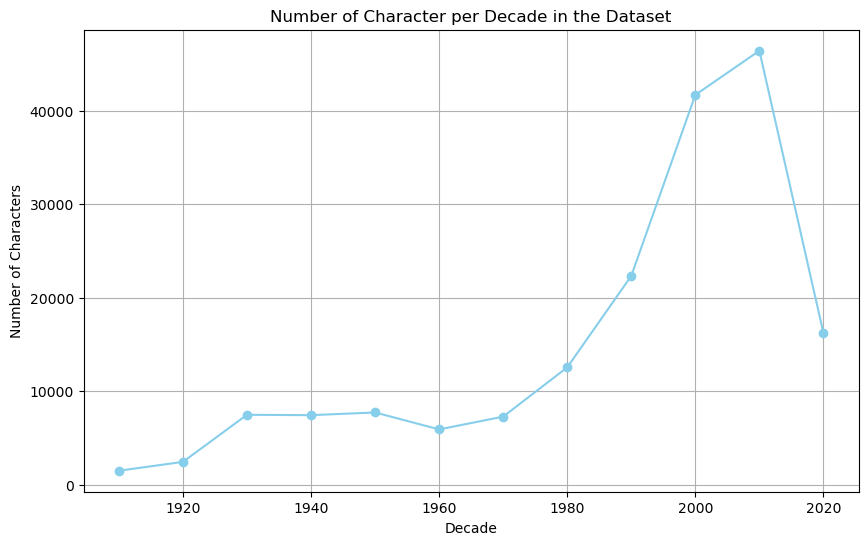

In [13]:
# group the movies by decade
personas_by_decade = final_personas_df.groupby(final_personas_df['decade'])
count_per_decade = personas_by_decade.size() # to have the number of characters per decade

plt.figure(figsize=(10, 6))
count_per_decade.plot(kind='line', color='skyblue', marker='o')
plt.title('Number of Character per Decade in the Dataset')
plt.xlabel('Decade')
plt.ylabel('Number of Characters')
plt.grid(True)
plt.show()

There is a fairly huge number of character per decade since 1930 so the later analysis should be reliable. However, the number of characters in 1910s' as well as 1920s' is low so these 2 decades might not have results that accurately represent reality.

In [12]:
result_df = final_personas_df[final_personas_df.apply(lambda row: 'pregnant' in row['Verbs'] or 'pregnant' in row['Adjectives'] or 'pregnant' in row['Nouns'], axis=1)]

# Display the result
display(result_df)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks,decade
13928,13929,24486794.0,/m/080p7hm,NaN,bessie barriscale,NaN,tt0006743,Margery Allison,F,NaN,The Green Swamp,1916.0,32.0,"[fails, fails, deliver, learning, learning]","[friendship, female, deliver, female, patient,...","[film, centers, husband, film, centers, husban...","[(film, NN), (centers, NNS), [(Allison, NNP)],...",1910.0
13929,13930,24486794.0,/m/080p7hm,NaN,bruce mcrae,NaN,tt0006743,Dr. Ward Allison,M,NaN,The Green Swamp,1916.0,49.0,"[fails, message, pleads, learning, learning]","[friendship, female, deliver, female, patient,...","[film, centers, husband, husband, husband, hus...","[(film, NN), (centers, NNS), [(Magery, NNP)], ...",1910.0
231126,231127,NaN,NaN,NaN,j. barney sherry,NaN,tt0006743,Dr. Jim Hendon,M,NaN,The Green Swamp,1916.0,42.0,[],"[pregnant, forgive]","[cycle, jealousy]","[(pregnant, JJ), [(Allison, NNP)], (forgive, J...",1910.0
231129,231130,NaN,NaN,NaN,louise brownell,NaN,tt0006743,Nurse Miller,F,NaN,The Green Swamp,1916.0,NaN,[],"[pregnant, forgive]","[cycle, jealousy]","[(pregnant, JJ), [(Allison, NNP)], (forgive, J...",1910.0
228985,228986,NaN,NaN,NaN,kate bruce,NaN,tt0003170,Young Wife's Mother,F,NaN,The Mothering Heart,1913.0,53.0,"[deserted, goes, goes, look, dying, finds, dyi...","[pregnant, child, child]","[husband, husband, affair, abandons, man, husb...","[(pregnant, JJ), (deserted, VBD), (husband, NN...",1910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269741,269742,NaN,NaN,NaN,joe campbell,NaN,tt11856036,Crew Member #3,M,NaN,Three Pregnant Men,2020.0,NaN,[follows],"[documentary, first, pregnant, final]","[world, term]","[(documentary, JJ), (follows, VBZ), (world, NN...",2020.0
269161,269162,NaN,NaN,NaN,travis cure,NaN,tt11724384,Andrew Thomas,M,NaN,I Wish I Never Met You,2022.0,NaN,"[turning, celebrating, take, escalate, gets, i...","[true, military, pregnant, first, entire, Wish]","[provider, father, brother, provider, father, ...","[(turning, VBG), (40, CD), (one, CD), (true, J...",2020.0
269162,269163,NaN,NaN,NaN,michelle l lamb,NaN,tt11724384,Lauren Thomas,F,NaN,I Wish I Never Met You,2022.0,NaN,"[turning, celebrating, grow, met]","[military, pregnant, first, tired, Wish]","[provider, father, brother, wheelchair, brothe...","[(turning, VBG), (40, CD), (one, CD), (provide...",2020.0
269163,269164,NaN,NaN,NaN,alphonso a'qen-aten jackson,NaN,tt11724384,Franklin Thomas,M,NaN,I Wish I Never Met You,2022.0,NaN,"[turning, hits, met]","[due, military, first, proverbial, Wish]","[provider, father, brother, wheelchair, brothe...","[(turning, VBG), (40, CD), (one, CD), (provide...",2020.0


In [14]:
# Function to apply stemming to a list of words with a progress bar
def stem_words_with_progress(word_list):
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in word_list:
        stemmed_words.append(stemmer.stem(word))
    return stemmed_words

In [15]:
# MAX RUN THIS PLEASE :)
tqdm.pandas(desc='Stemming')
final_personas_df['Verbs'] = final_personas_df['Verbs'].progress_apply(stem_words_with_progress)
display(final_personas_df)

Stemming: 100%|███████████████████████| 178964/178964 [02:44<00:00, 1086.33it/s]


,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks,decade,genre
0,191825,7490915.0,/m/0kv910,NaN,william tedmarsh,NaN,tt0437590,The Butler,M,NaN,The Wily Chaperon,1915.0,39.0,"[propos, put, put, advertis, chaperon, captiv,...",[],"[house, house, irate, house, father, ways, cha...","[[(Willis, NNP)], (proposes, VBZ), [(Myrtle, N...",1910.0,[]
1,62899,2898822.0,/m/08b2hs,NaN,cecile arnold,NaN,tt0004311,Actress,F,NaN,The Masquerader,1914.0,23.0,"[play, involv]","[several, lady, popular]","[bungles, scenes, returns, charms, director, p...","[[(Charlie, NNP)], (plays, VBZ), (bungles, NNS...",1910.0,"[Indie, Comedy]"
2,124045,11453506.0,/m/02rd7zm,NaN,phyllis allen,NaN,tt0004007,Flirty Woman,F,NaN,Gentlemen of Nerve,1914.0,53.0,[],[],[],[],1910.0,"[Indie, Comedy]"
3,62897,2898822.0,/m/08b2hs,NaN,charles murray,NaN,tt0004311,Film Director,M,NaN,The Masquerader,1914.0,42.0,"[play, kick, dress, dress, make, make, involv]","[several, lady]","[bungles, scenes, scenes, lady, charms, plot, ...","[[(Charlie, NNP)], (plays, VBZ), (bungles, NNS...",1910.0,"[Indie, Comedy]"
4,62893,2898822.0,/m/08b2hs,NaN,minta durfee,NaN,tt0004311,Leading Lady,F,NaN,The Masquerader,1914.0,25.0,[dress],"[several, popular]","[actor, bungles, returns, charms, director, wo...","[[(Charlie, NNP)], (actor, NN), (bungles, NNS)...",1910.0,"[Indie, Comedy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178959,269440,NaN,NaN,NaN,ayreist bizor,NaN,tt11764314,Goon,M,NaN,Let's Eat,2020.0,NaN,[],[],"[release, custody, aim, mind, Things]","[(release, NN), (Federal, NNP), (custody, NN),...",2020.0,[]
178960,269441,NaN,NaN,NaN,fred elfalan,NaN,tt11764314,Goon 2,M,NaN,Let's Eat,2020.0,NaN,[],[],"[release, custody, aim, mind, Things]","[(release, NN), (Federal, NNP), (custody, NN),...",2020.0,[]
178961,269442,NaN,NaN,NaN,myqua hall,NaN,tt11764314,Kelis,F,NaN,Let's Eat,2020.0,NaN,[],[],[],[],2020.0,[]
178962,269450,NaN,NaN,NaN,david a katz,NaN,tt11764870,Jack Allen,M,NaN,Tears of the Clown,2020.0,NaN,[],"[Serial, clown, double]","[killer, clown, living]","[[(Serial, JJ)], (killer, NN), (clown, JJ), [(...",2020.0,[]


In [16]:
def create_gender_dictionaries(df):
    # Initialize dictionaries for male and female characters
    male_dict = {}
    female_dict = {}

    # Iterate through the dataframe and populate dictionaries
    for index, row in df.iterrows():
        gender = row['actor_gender']
        decade = row['decade'] # we want the create a ductionnary per decade to later analyze

        # Check if the gender is male and handle empty lists (characters don't necessarily have words of the 3 cat. associated to them
        if gender == 'M':
            if decade not in male_dict:
                male_dict[decade] = {'Verbs': [], 'Adjectives': [], 'Nouns': []} # create a dict per decade

            male_dict[decade]['Verbs'].extend(row['Verbs']) if row['Verbs'] else None
            male_dict[decade]['Adjectives'].extend(row['Adjectives']) if row['Adjectives'] else None
            male_dict[decade]['Nouns'].extend(row['Nouns']) if row['Nouns'] else None

        # Check if the gender is female and handle empty lists
        elif gender == 'F':
            if decade not in female_dict:
                female_dict[decade] = {'Verbs': [], 'Adjectives': [], 'Nouns': []}

            female_dict[decade]['Verbs'].extend(row['Verbs']) if row['Verbs'] else None
            female_dict[decade]['Adjectives'].extend(row['Adjectives']) if row['Adjectives'] else None
            female_dict[decade]['Nouns'].extend(row['Nouns']) if row['Nouns'] else None

    return male_dict, female_dict


In [99]:
male_dict, female_dict = create_gender_dictionaries(final_personas_df.sample(10000))

In [17]:
#test function to check the dictionnaries per decade
def print_gender_dictionaries(male_dict, female_dict):
    # Print the first few elements of each decade in the male dictionary
    print("Male Dictionary:")
    for decade, values in male_dict.items():
        print(f"Decade: {decade}")
        print(f"Verbs: {values['Verbs'][:5]}")
        print(f"Adjectives: {values['Adjectives'][:5]}")
        print(f"Nouns: {values['Nouns'][:5]}")
        print()

    # Print the first few elements of each decade in the female dictionary
    print("Female Dictionary:")
    for decade, values in female_dict.items():
        print(f"Decade: {decade}")
        print(f"Verbs: {values['Verbs'][:5]}")
        print(f"Adjectives: {values['Adjectives'][:5]}")
        print(f"Nouns: {values['Nouns'][:5]}")
        print()

# Assuming df is your DataFrame
print_gender_dictionaries(male_dict, female_dict)

Male Dictionary:
Decade: 1910.0
Verbs: ['propos', 'put', 'put', 'advertis', 'chaperon']
Adjectives: ['several', 'lady', 'several', 'lady', 'table']
Nouns: ['house', 'house', 'irate', 'house', 'father']

Decade: 1920.0
Verbs: ['put', 'wagon', 'receiv', 'offer', 'join']
Adjectives: ['new', 'first', 'army', 'American', 'eastern']
Nouns: ['parents', 'gang', 'races', 'widow', 'sons']

Decade: 1930.0
Verbs: ['deal', 'claim', 'get', 'releas', 'brought']
Adjectives: ['sepulchral', 'brutish', 'psychotic', 'absent', 'last']
Nouns: ['mute', 'butler', 'fantasist', 'spendthrift', 'notifies']

Decade: 1940.0
Verbs: ['cemeteri', 'buri', 'leav', 'call', 'run']
Adjectives: ['animal', 'cemetery', 'firing', 'ghost', 'mother']
Nouns: ['book', 'friends', 'animals', 'humans', 'mama']

Decade: 1950.0
Verbs: ['want', 'turn', 'turn', 'turn', 'go']
Adjectives: ['old', 'junior', 'senior', 'high', 'fix']
Nouns: ['movie', 'rules', 'Frances', 'years', 'summer']

Decade: 1960.0
Verbs: ['boy', 'rais', 'becom', 'acqua

In [18]:
for decade, categories in female_dict.items():
    # Accessing the frequency of "pregnant" in the 'Nouns' category for the current decade
    pregnant_frequency_Nouns = categories.get('Nouns', []).count('flattery')

    # Accessing the frequency of "pregnant" in the 'Verbs' category for the current decade
    pregnant_frequency_Verbs = categories.get('Verbs', []).count('flattery')

    # Accessing the frequency of "pregnant" in the 'Adjectives' category for the current decade
    pregnant_frequency_Adj = categories.get('Adjectives', []).count('flattery')

    print(f"Decade: {decade}")
    print("Frequency of 'flattery' in female_dict nouns:", pregnant_frequency_Nouns)
    print("Frequency of 'flattery' in female_dict verbs:", pregnant_frequency_Verbs)
    print("Frequency of 'flattery' in female_dict adj:", pregnant_frequency_Adj)
    print()


Decade: 1910.0
Frequency of 'flattery' in female_dict nouns: 0
Frequency of 'flattery' in female_dict verbs: 0
Frequency of 'flattery' in female_dict adj: 0

Decade: 1920.0
Frequency of 'flattery' in female_dict nouns: 0
Frequency of 'flattery' in female_dict verbs: 0
Frequency of 'flattery' in female_dict adj: 0

Decade: 1930.0
Frequency of 'flattery' in female_dict nouns: 0
Frequency of 'flattery' in female_dict verbs: 0
Frequency of 'flattery' in female_dict adj: 0

Decade: 1940.0
Frequency of 'flattery' in female_dict nouns: 0
Frequency of 'flattery' in female_dict verbs: 0
Frequency of 'flattery' in female_dict adj: 0

Decade: 1950.0
Frequency of 'flattery' in female_dict nouns: 0
Frequency of 'flattery' in female_dict verbs: 0
Frequency of 'flattery' in female_dict adj: 0

Decade: 1960.0
Frequency of 'flattery' in female_dict nouns: 0
Frequency of 'flattery' in female_dict verbs: 0
Frequency of 'flattery' in female_dict adj: 0

Decade: 1970.0
Frequency of 'flattery' in female_dic

In [100]:
def calculate_word_frequencies(dictionary):
    # Initialize a dictionary for each category (Verbs, Adjectives, Nouns)
    frequencies = {'Verbs': {}, 'Adjectives': {}, 'Nouns': {}}

    # Iterate through the dictionary and calculate word frequencies
    for category, words in dictionary.items():
        total_words = len(words)
        word_counter = Counter(words)
        frequencies[category] = {word: count / total_words for word, count in word_counter.items()}

    return frequencies

In [17]:
from collections import Counter

def calculate_word_frequencies_bis(decades_dict):
    # Initialize a dictionary to store frequencies for each decade
    all_frequencies = {}

    # Iterate through the decades and calculate word frequencies
    for decade, dictionary in decades_dict.items():
        frequencies = {'Verbs': {}, 'Adjectives': {}, 'Nouns': {}}

        for category, words in dictionary.items():
            total_words = len(words)
            word_counter = Counter(words)
            frequencies[category] = {word: count / total_words for word, count in word_counter.items()}

        all_frequencies[decade] = frequencies

    return all_frequencies

In [103]:
male_frequencies_per_decade = calculate_word_frequencies_bis(male_dict)
female_frequencies_per_decade = calculate_word_frequencies_bis(female_dict)

In [20]:
male_frequencies_per_decade  = {decade: calculate_word_frequencies(dictionary) for decade, dictionary in male_dict.items()}
female_frequencies_per_decade = {decade: calculate_word_frequencies(dictionary) for decade, dictionary in female_dict.items()}

In [93]:
def subtract_frequencies(frequencies_1, frequencies_2): # function to get relative frequencies for a word in 2 separate dictionnaries
    subtracted_frequencies = {}
    words_only_in_freq1 = set()
    words_only_in_freq2 = set()

    # Iterate through decades
    for decade in frequencies_1.keys():
        # Initialize dictionary for the current decade
        subtracted_frequencies[decade] = {'Verbs': {}, 'Adjectives': {}, 'Nouns': {}}

        # Iterate through categories (Verbs, Adjectives, Nouns)
        for category in frequencies_1[decade].keys():
            # Get the set of words in both dictionaries for the current category
            common_words = set(frequencies_1[decade][category].keys()) & set(frequencies_2[decade][category].keys())
            # Calculate the subtracted frequencies for the current category
            for word in common_words:
                freq_1 = frequencies_1[decade][category].get(word, 0)
                freq_2 = frequencies_2[decade][category].get(word, 0)
                subtracted_frequencies[decade][category][word] = freq_1 - freq_2

            # Add the remaining words (present in one dictionary but not the other) with a frequency of 0
            remaining_words_1 = set(frequencies_1[decade][category].keys()) - common_words # words only in freq_1
            remaining_words_2 = set(frequencies_2[decade][category].keys()) - common_words # words only in freq_2
           
            
            words_only_in_freq1.update(remaining_words_1)
            words_only_in_freq2.update(remaining_words_2)

            for word in remaining_words_1:
                subtracted_frequencies[decade][category][word] = frequencies_1[decade][category][word] # assign the freq of freq_1 to that word

            for word in remaining_words_2:
                subtracted_frequencies[decade][category][word] = -frequencies_2[decade][category][word]
                
    return subtracted_frequencies, words_only_in_freq1, words_only_in_freq2


In [18]:
def subtract_frequencies_bis(frequencies_1, frequencies_2): 
    subtracted_frequencies = {}
    words_only_in_freq1 = {}
    words_only_in_freq2 = {}

    for decade in frequencies_1.keys():
        subtracted_frequencies[decade] = {'Verbs': {}, 'Adjectives': {}, 'Nouns': {}}
        words_only_in_freq1[decade] = {'Verbs': {}, 'Adjectives': {}, 'Nouns': {}}
        words_only_in_freq2[decade] = {'Verbs': {}, 'Adjectives': {}, 'Nouns': {}}

        for category in frequencies_1[decade].keys():
            common_words = set(frequencies_1[decade][category].keys()) & set(frequencies_2[decade][category].keys())

            for word in common_words:
                freq_1 = frequencies_1[decade][category].get(word, 0)
                freq_2 = frequencies_2[decade][category].get(word, 0)
                subtracted_frequencies[decade][category][word] = freq_1 - freq_2

            remaining_words_1 = set(frequencies_1[decade][category].keys()) - common_words
            remaining_words_2 = set(frequencies_2[decade][category].keys()) - common_words

            for word in remaining_words_1:
                subtracted_frequencies[decade][category][word] = frequencies_1[decade][category][word]
                words_only_in_freq1[decade][category][word] = frequencies_1[decade][category][word]

            for word in remaining_words_2:
                subtracted_frequencies[decade][category][word] = -frequencies_2[decade][category][word]
                words_only_in_freq2[decade][category][word] = frequencies_2[decade][category][word]

    return subtracted_frequencies, words_only_in_freq1, words_only_in_freq2

In [105]:
relative_frequencies, unique_male, unique_female = subtract_frequencies_bis(male_frequencies_per_decade, female_frequencies_per_decade)

In [24]:
total_words = 0
for decade, categories in relative_frequencies.items():
    for category, words in categories.items():
        total_words += len(words)
        
total_words_M = 0
for decade, categories in unique_male.items():
    for category, words in categories.items():
        total_words_M += len(words)
        
total_words_F = 0
for decade, categories in unique_female.items():
    for category, words in categories.items():
        total_words_F += len(words)
        
print("The total number of words is:", total_words)
print(total_words_M, " words are solely associated to men, representing ",100*total_words_M/total_words, "% of the total number of words")
print(total_words_F, " words are solely associated to women, representing ",100*total_words_F/total_words, "% of the total number of words")

The total number of words is: 299210
87957  words are solely associated to men, representing  29.396410547775808 % of the total number of words
29656  words are solely associated to women, representing  9.911433441395674 % of the total number of words


In [24]:
def plot_rel_freq_per_decade(relative_frequencies, categories):
    # Create subplots for each category
    decades = relative_frequencies.keys()
    num_categories = len(categories)

    fig, axs = plt.subplots(len(decades), num_categories, figsize=(5 * num_categories, 3 * len(decades)))

    # Iterate through each decade
    for i, decade in enumerate(decades):
        for j, category in enumerate(categories):
            # Get the top words and their frequencies
            top_words_positive = [word for _, word in sorted(
                zip(relative_frequencies[decade][category].values(), relative_frequencies[decade][category].keys()),
                key=lambda x: x[0],
                reverse=True
            )[:5]]

            top_words_negative = [word for _, word in sorted(
                zip(relative_frequencies[decade][category].values(), relative_frequencies[decade][category].keys()),
                key=lambda x: x[0]
            )[:5]]

            top_words = top_words_positive + top_words_negative
            top_frequencies = [relative_frequencies[decade][category][word] for word in top_words]

            # Plot the bar chart for each category
            bars = axs[i, j].bar(top_words, top_frequencies, color=['skyblue' if freq >= 0 else 'pink' for freq in top_frequencies])
            axs[i, j].set_title(f'{category} {decade}')
            axs[i, j].set_ylabel('Relative frequencies: Male - Female')

            # Rotate x-axis tick labels
            axs[i, j].set_xticklabels(top_words, rotation=45, ha='right')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

/var/folders/71/3q_x6c_90j90w5lmxycvpzgr0000gn/T/ipykernel_53229/3087735464.py:32: UserWarning:

FixedFormatter should only be used together with FixedLocator



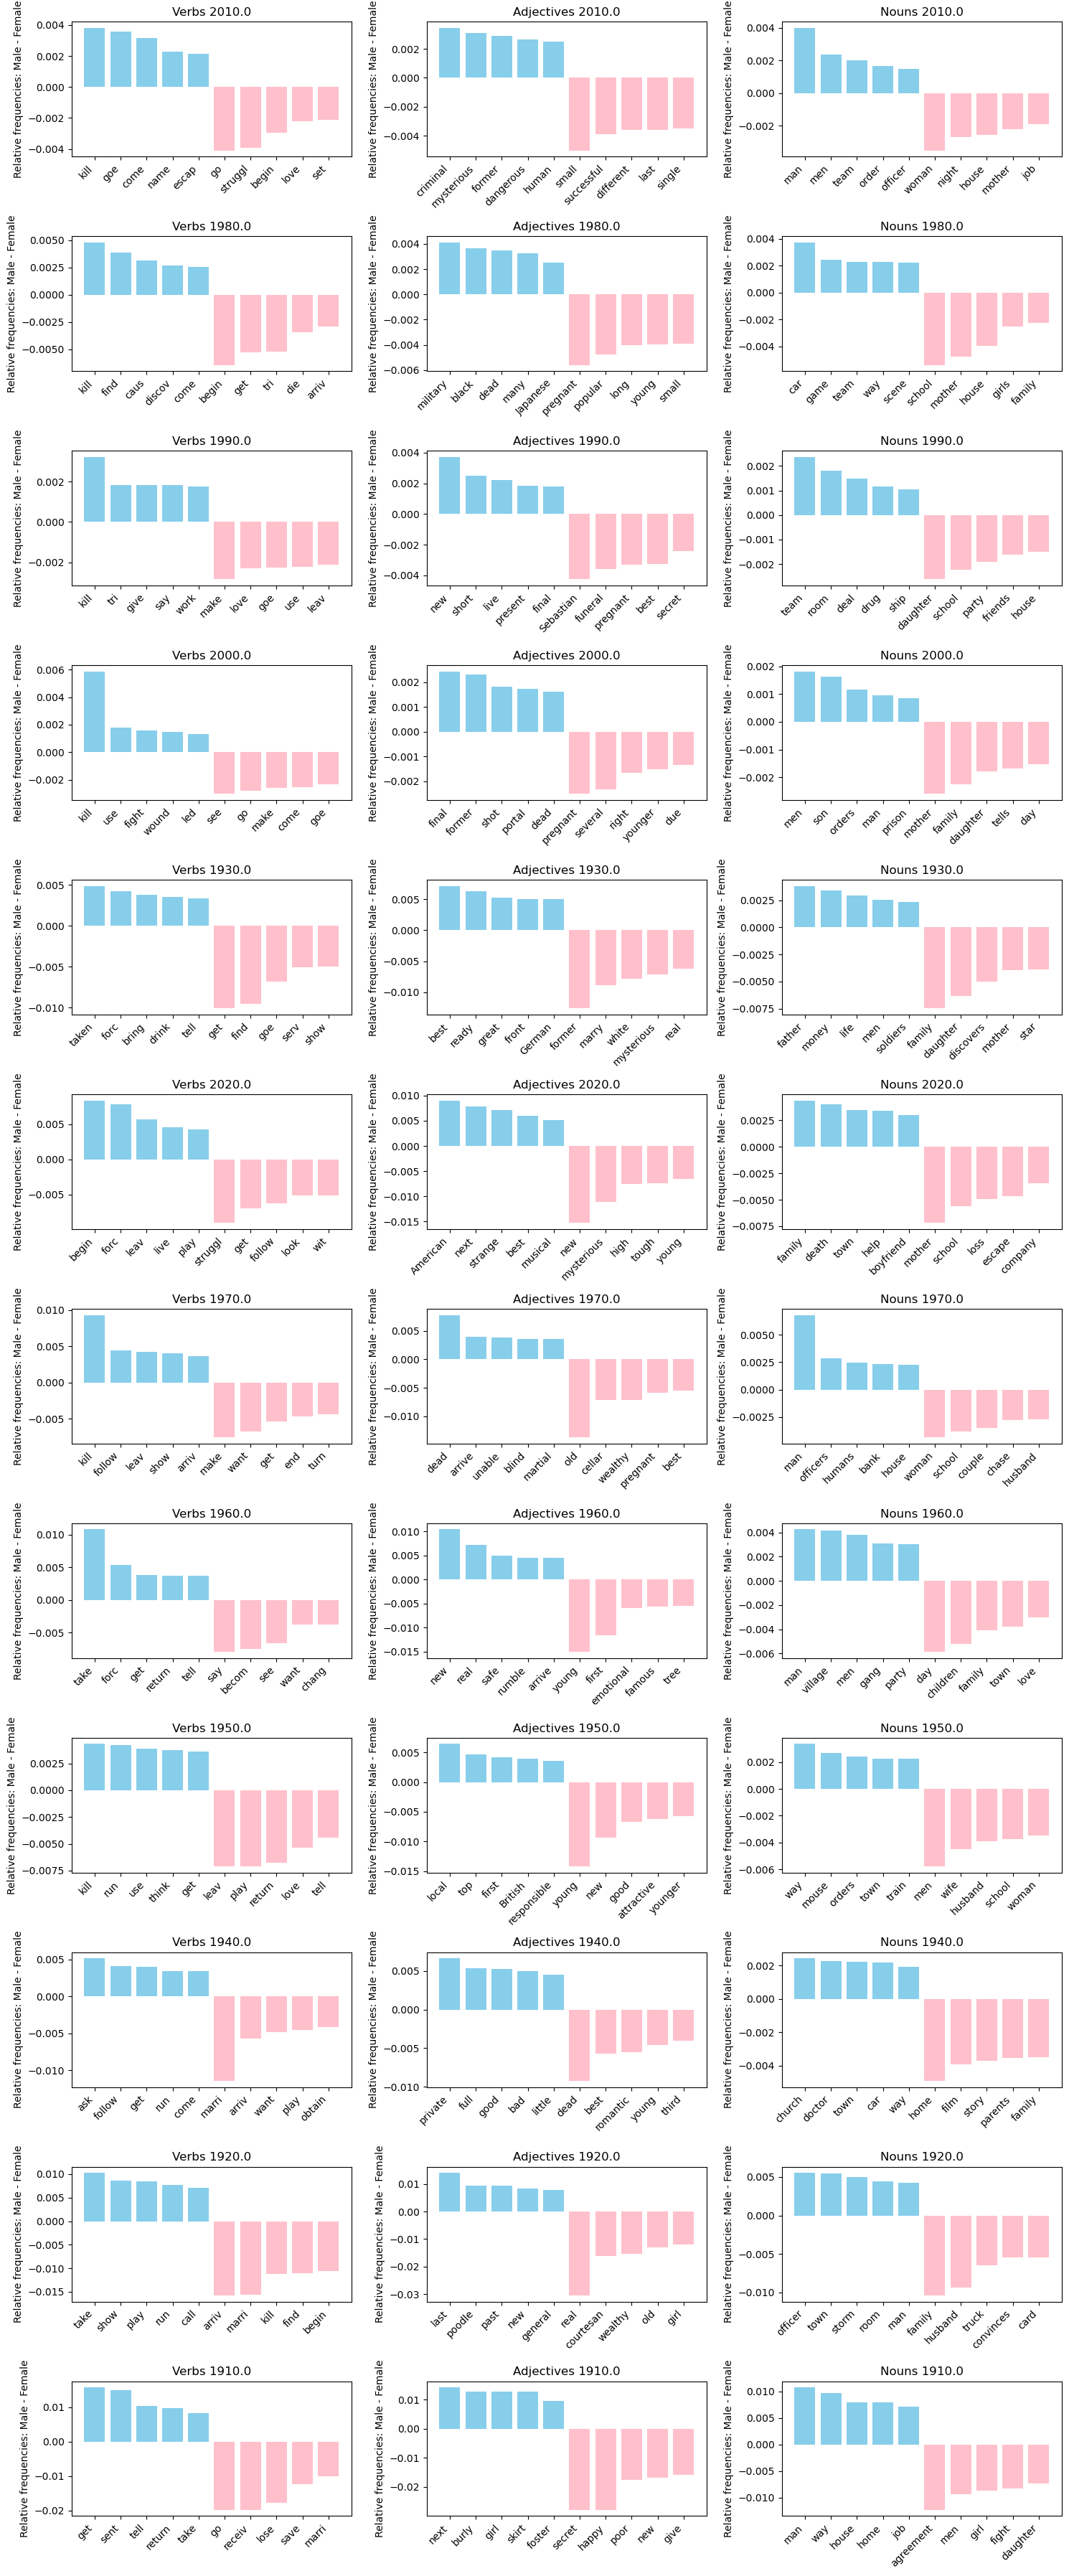

In [107]:
categories_to_plot = ['Verbs', 'Adjectives', 'Nouns']
plot_rel_freq_per_decade(relative_frequencies, categories_to_plot)

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_rel_freq_per_decade_interactive(relative_frequencies):
    # Extract decades
    decades = list(relative_frequencies.keys())

    # Create a dictionary to store visibility status of each trace
    visibility_dict = {f"{decade}": False for decade in decades}

    # Create subplot titles
    subplot_titles = ['Verbs', 'Adjectives', 'Nouns']

    # Create the subplot figure
    fig = make_subplots(rows=1, cols=3, subplot_titles=subplot_titles,
                        specs=[[{'type': 'bar'}] * 3],
                        shared_xaxes=False, shared_yaxes=True)

    # Add traces to the figure
    for i, category in enumerate(['Verbs', 'Adjectives', 'Nouns']):
        traces = []
        for decade in decades:
            top_words_positive = [word for _, word in sorted(
                zip(relative_frequencies[decade][category].values(),
                    relative_frequencies[decade][category].keys()),
                key=lambda x: x[0], reverse=True
            )[:5]]

            top_words_negative = [word for _, word in sorted(
                zip(relative_frequencies[decade][category].values(),
                    relative_frequencies[decade][category].keys()),
                key=lambda x: x[0]
            )[:5]]

            top_words = top_words_positive + top_words_negative
            top_frequencies = [relative_frequencies[decade][category][word] for word in top_words]

            # Plot the bar chart for each category
            bars = go.Bar(x=top_words, y=top_frequencies,
                          marker_color=['skyblue' if freq >= 0 else 'pink' for freq in top_frequencies],
                          name=f"{decade}")

            traces.append(bars)

        # Set the visibility of the first trace to True
        visibility_dict[decades[0]] = True

        # Add traces to the figure
        for trace in traces:
            fig.add_trace(trace, row=1, col=i+1)

    # Update layout and add slider
    fig.update_layout(
        updatemenus=[{
            'type': 'buttons',
            'showactive': False,
            'buttons': [{'label': 'Play',
                         'method': 'animate',
                         'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]}]}],
        sliders=[{
            'steps': [{'args': [[trace.name], {'frame': {'duration': 500, 'redraw': True}, 'mode': 'immediate',
                                               'transition': {'duration': 300}}],
                       'label': trace.name,
                       'method': 'animate'} for trace in traces],
            'currentvalue': {'prefix': 'Decade: ', 'visible': True, 'xanchor': 'right', 'font': {'size': 16}},
            'transition': {'duration': 300},
            'pad': {'t': 50},
            'len': 0.9,
            'x': 0.1,
            'y': 0,
            'visible': True,
            'steps': [{'args': [[trace.name], {'frame': {'duration': 500, 'redraw': True}, 'mode': 'immediate',
                                               'transition': {'duration': 300}}],
                       'label': trace.name,
                       'method': 'animate'} for trace in traces]
        }]
    )

    # Show the plot
    fig.show()


In [55]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_rel_freq_per_decade_interactive(relative_frequencies, categories):
    # Create subplots for each category
    decades = list(relative_frequencies.keys())
    num_categories = len(categories)

    # Create a dictionary to store visibility status of each trace
    visibility_dict = {f"{category}": False for category in categories}

    # Create traces for each category
    traces = []
    for category in categories:
        # Get the top words and their frequencies for the first decade
        top_words_positive = [word for _, word in sorted(
            zip(relative_frequencies[decades[0]][category].values(), relative_frequencies[decades[0]][category].keys()),
            key=lambda x: x[0],
            reverse=True
        )[:5]]

        top_words_negative = [word for _, word in sorted(
            zip(relative_frequencies[decades[0]][category].values(), relative_frequencies[decades[0]][category].keys()),
            key=lambda x: x[0]
        )[:5]]

        top_words = top_words_positive + top_words_negative
        top_frequencies = [relative_frequencies[decades[0]][category][word] for word in top_words]

        # Plot the bar chart for each category
        bars = go.Bar(x=top_words, y=top_frequencies,
                      marker_color=['skyblue' if freq >= 0 else 'pink' for freq in top_frequencies],
                      name=f"{category}")

        traces.append(bars)
        visibility_dict[f"{category}"] = True  # Show only the first category initially

    # Create subplot titles
    subplot_titles = [f"{category}" for category in categories]

    # Create the subplot figure
    fig = make_subplots(rows=1, cols=num_categories, subplot_titles=subplot_titles,
                        specs=[[{'type': 'bar'}] * num_categories],
                        shared_xaxes=False, shared_yaxes=True)

    # Add traces to the figure
    for trace in traces:
        fig.add_trace(trace)

    # Update layout and add slider
    fig.update_layout(
        updatemenus=[{
            'type': 'buttons',
            'showactive': False,
            'buttons': [{'label': 'Play',
                         'method': 'animate',
                         'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]}]}],
        sliders=[{
            'steps': [{'args': [[trace.name], {'frame': {'duration': 500, 'redraw': True}, 'mode': 'immediate',
                                               'transition': {'duration': 300}}],
                       'label': trace.name,
                       'method': 'animate'} for trace in traces],
            'currentvalue': {'prefix': 'Decade: ', 'visible': True, 'xanchor': 'right', 'font': {'size': 16}},
            'transition': {'duration': 300},
            'pad': {'t': 50},
            'len': 0.9,
            'x': 0.1,
            'y': 0,
            'visible': True,
            'steps': [{'args': [[trace.name], {'frame': {'duration': 500, 'redraw': True}, 'mode': 'immediate',
                                               'transition': {'duration': 300}}],
                       'label': trace.name,
                       'method': 'animate'} for trace in traces]
        }]
    )

    # Update visibility based on the selected category
    for trace_name in visibility_dict.keys():
        fig.update_traces(visible=visibility_dict[trace_name], selector={'name': trace_name})

    # Show the plot
    fig.show()


In [81]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_rel_freq_per_decade(relative_frequencies, categories):
    # Create subplots for each category
    decades = sorted(relative_frequencies.keys())
    num_categories = len(categories)

    # Set up the initial decade
    initial_decade = decades[0]

    # Create subplots
    fig = make_subplots(rows=1, cols=num_categories, subplot_titles=[f"{category} {initial_decade}" for category in categories])

    def update_plot(decade):
        for j, category in enumerate(categories):
            top_words_positive = [word for _, word in sorted(
                zip(relative_frequencies[decade][category].values(), relative_frequencies[decade][category].keys()),
                key=lambda x: x[0],
                reverse=True
            )[:5]]

            top_words_negative = [word for _, word in sorted(
                zip(relative_frequencies[decade][category].values(), relative_frequencies[decade][category].keys()),
                key=lambda x: x[0]
            )[:5]]

            top_words = top_words_positive + top_words_negative
            top_frequencies = [relative_frequencies[decade][category][word] for word in top_words]

            # Clear previous traces
            fig.data = []

            # Add new bar chart trace
            fig.add_trace(go.Bar(x=top_words, y=top_frequencies, marker=dict(color=['skyblue' if freq >= 0 else 'pink' for freq in top_frequencies])),
                          row=1, col=j+1)

            # Update subplot title
            fig.update_layout(title_text=f"{category} {decade}", showlegend=False)

    # Create buttons for each decade
    buttons = [dict(label=str(decade),
                    method='relayout',
                    args=[{'xaxis.range[0]': decade, 'xaxis.range[1]': decade}]) for decade in decades]

    # Add buttons to the layout
    fig.update_layout(
        updatemenus=[dict(type='buttons', showactive=False, buttons=buttons, x=0.1, xanchor='left', y=1.15, yanchor='top')],
        sliders=[dict(currentvalue=dict(prefix='Decade: '), steps=[dict(label=str(decade), method='relayout',
                                                                         args=[{'xaxis.range[0]': decade, 'xaxis.range[1]': decade}]) for decade in decades])],
        showlegend=False
    )

    # Initial plot
    update_plot(initial_decade)

    # Display plot
    fig.show()

# Example usage:
# plot_rel_freq_per_decade(relative_frequencies, ['Verbs', 'Adjectives', 'Nouns'])


In [82]:
categories_to_plot = ['Verbs', 'Adjectives', 'Nouns']
plot_rel_freq_per_decade_interactive(relative_frequencies, categories_to_plot)

AttributeError: module 'plotly.graph_objects' has no attribute 'Slider'

## to do list:
- stemming on verbs 
- display words associated to unisex per decade (with top frequencies)

In [26]:
def plot_top_words_per_decade(frequencies, categories, col = "blue"):
    # Create subplots for each category
    decades = frequencies.keys()
    num_categories = len(categories)

    fig, axs = plt.subplots(len(decades), num_categories, figsize=(5 * num_categories, 3 * len(decades)))

    # Iterate through each decade
    for i, decade in enumerate(decades):
        for j, category in enumerate(categories):
            # Get the top words and their frequencies
            top_words = [word for _, word in sorted(
                zip(frequencies[decade][category].values(), frequencies[decade][category].keys()),
                key=lambda x: x[0],
                reverse=True
            )[:5]]

            top_frequencies = [frequencies[decade][category][word] for word in top_words]

            # Plot the bar chart for each category
            bars = axs[i, j].bar(top_words, top_frequencies, color=col)
            axs[i, j].set_title(f'{category} {decade}')
            axs[i, j].set_ylabel('Absolute Frequency Difference')

            # Rotate x-axis tick labels
            axs[i, j].set_xticklabels(top_words, rotation=45, ha='right')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

/var/folders/71/3q_x6c_90j90w5lmxycvpzgr0000gn/T/ipykernel_3015/794310802.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j].set_xticklabels(top_words, rotation=45, ha='right')


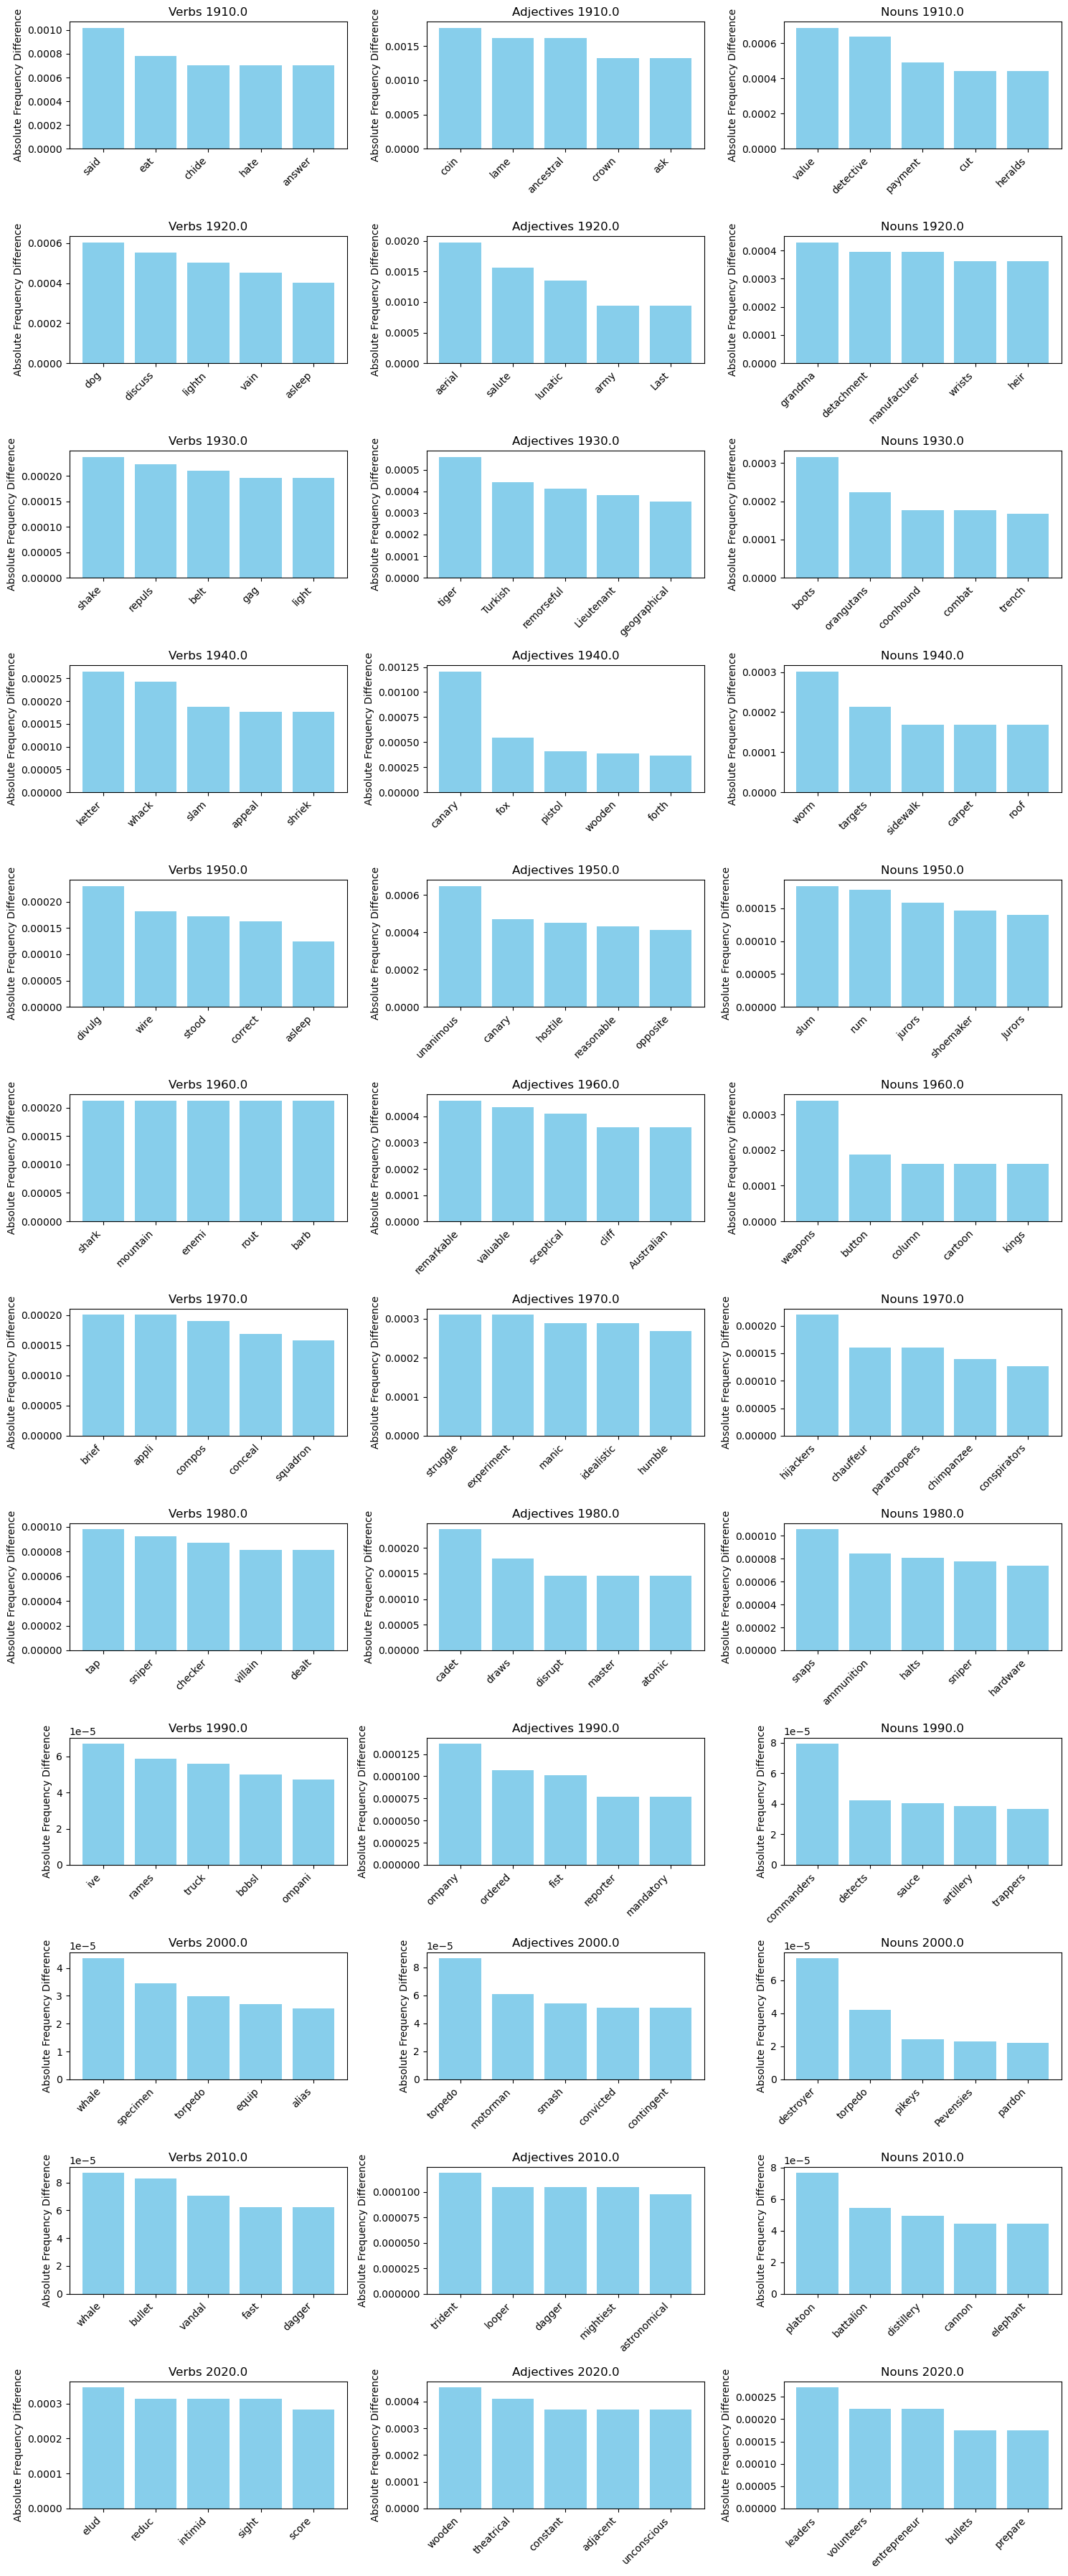

In [27]:
categories_to_plot = ['Verbs', 'Adjectives', 'Nouns']
plot_top_words_per_decade(unique_male, categories_to_plot, "skyblue")

/var/folders/71/3q_x6c_90j90w5lmxycvpzgr0000gn/T/ipykernel_3015/794310802.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j].set_xticklabels(top_words, rotation=45, ha='right')


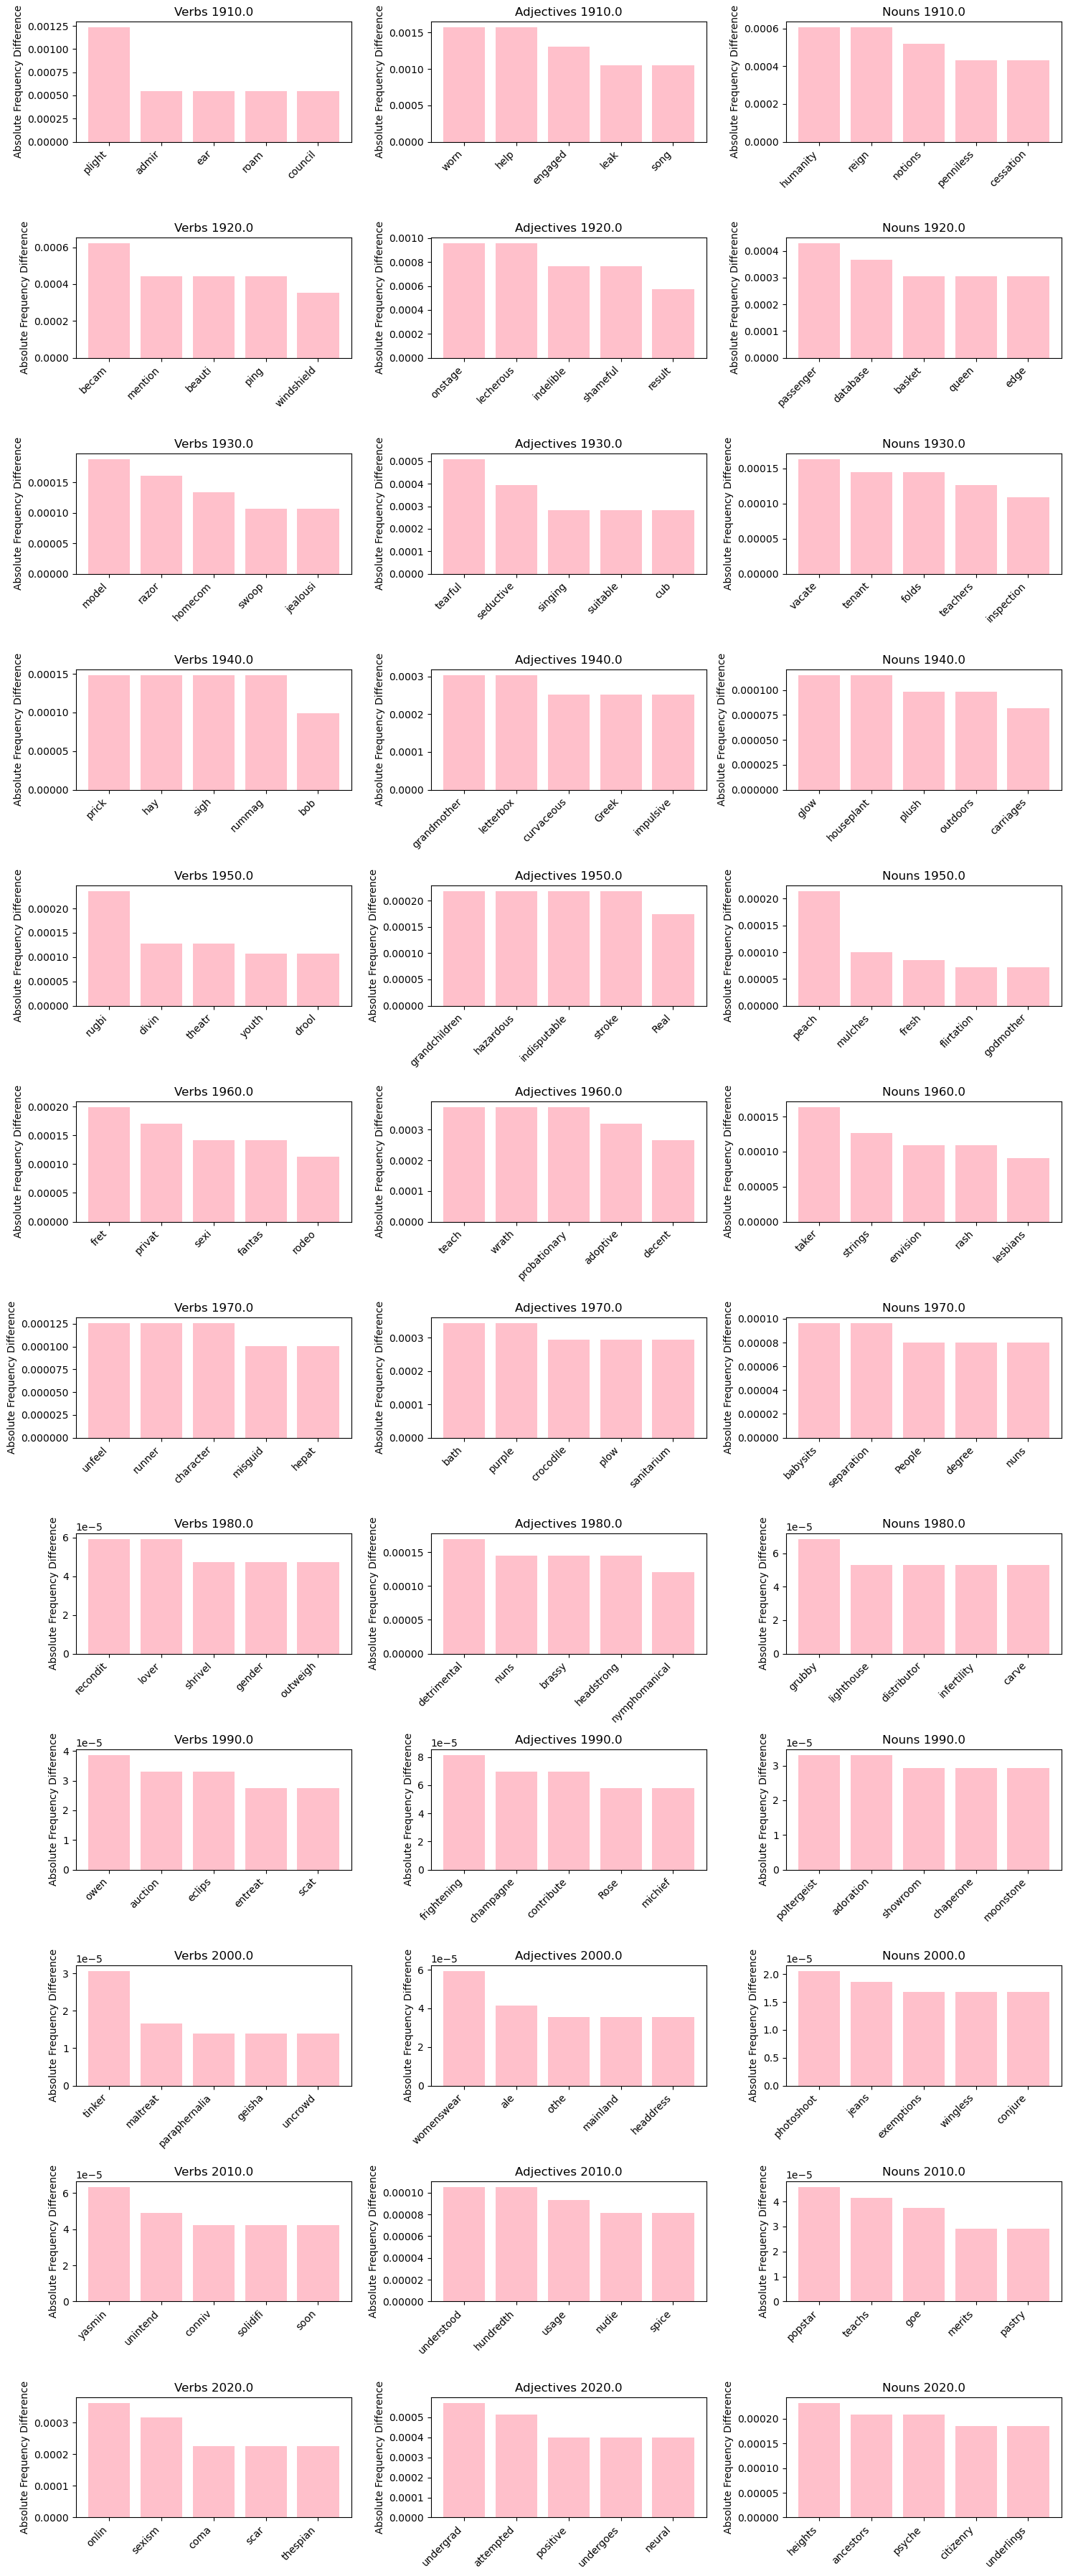

In [28]:
plot_top_words_per_decade(unique_female, categories_to_plot, "pink")

In [ ]:
# Assuming df is your DataFrame and 'desired_genre' is the genre you want to filter by
desired_genre = 'Action'

# Filter rows where the 'genre' column is a list and contains the desired genre
df_subset_genre = final_personas_df[final_personas_df['genre'].str.len() > 0]
df_subset_genre = df_subset_genre[df_subset_genre['genre'].apply(lambda x: desired_genre in x)]
df_subset_genre

In [31]:
def subset_df(df):
    genre='Western'
    df_subset_genre = df[df['genre'].str.len() > 0]
    df_subset_genre = df_subset_genre[df_subset_genre['genre'].apply(lambda x: genre in x)]
    return df_subset_genre

In [32]:
subset_action = subset_df(final_personas_df)

In [ ]:
def plot_by_genre(genre,df):
    df_subset_genre=subset_df(df)
    male_dict_genre,female_dict_genre=create_gender_dictionaries(df_subset_genre)
    male_frequencies_per_decade_genre  = {decade: calculate_word_frequencies(male_dict_genre) for decade, dictionary in male_dict_genre.items()}
    female_frequencies_per_decade_genre = {decade: calculate_word_frequencies(female_dict_genre) for decade, dictionary in female_dict_genre.items()}
    relative_frequencies_genre, unique_male_genre, unique_female_genre = subtract_frequencies(male_frequencies_per_decade_genre, female_frequencies_per_decade_genre)
    plot_rel_freq_per_decade(relative_frequencies_genre, ['Verbs', 'Adjectives', 'Nouns'])

In [33]:
male_dict_genre,female_dict_genre=create_gender_dictionaries(subset_action)
male_frequencies_per_decade_genre  = calculate_word_frequencies_bis(male_dict_genre)

In [34]:
female_frequencies_per_decade_genre  = calculate_word_frequencies_bis(female_dict_genre)

/var/folders/71/3q_x6c_90j90w5lmxycvpzgr0000gn/T/ipykernel_59680/3087735464.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j].set_xticklabels(top_words, rotation=45, ha='right')


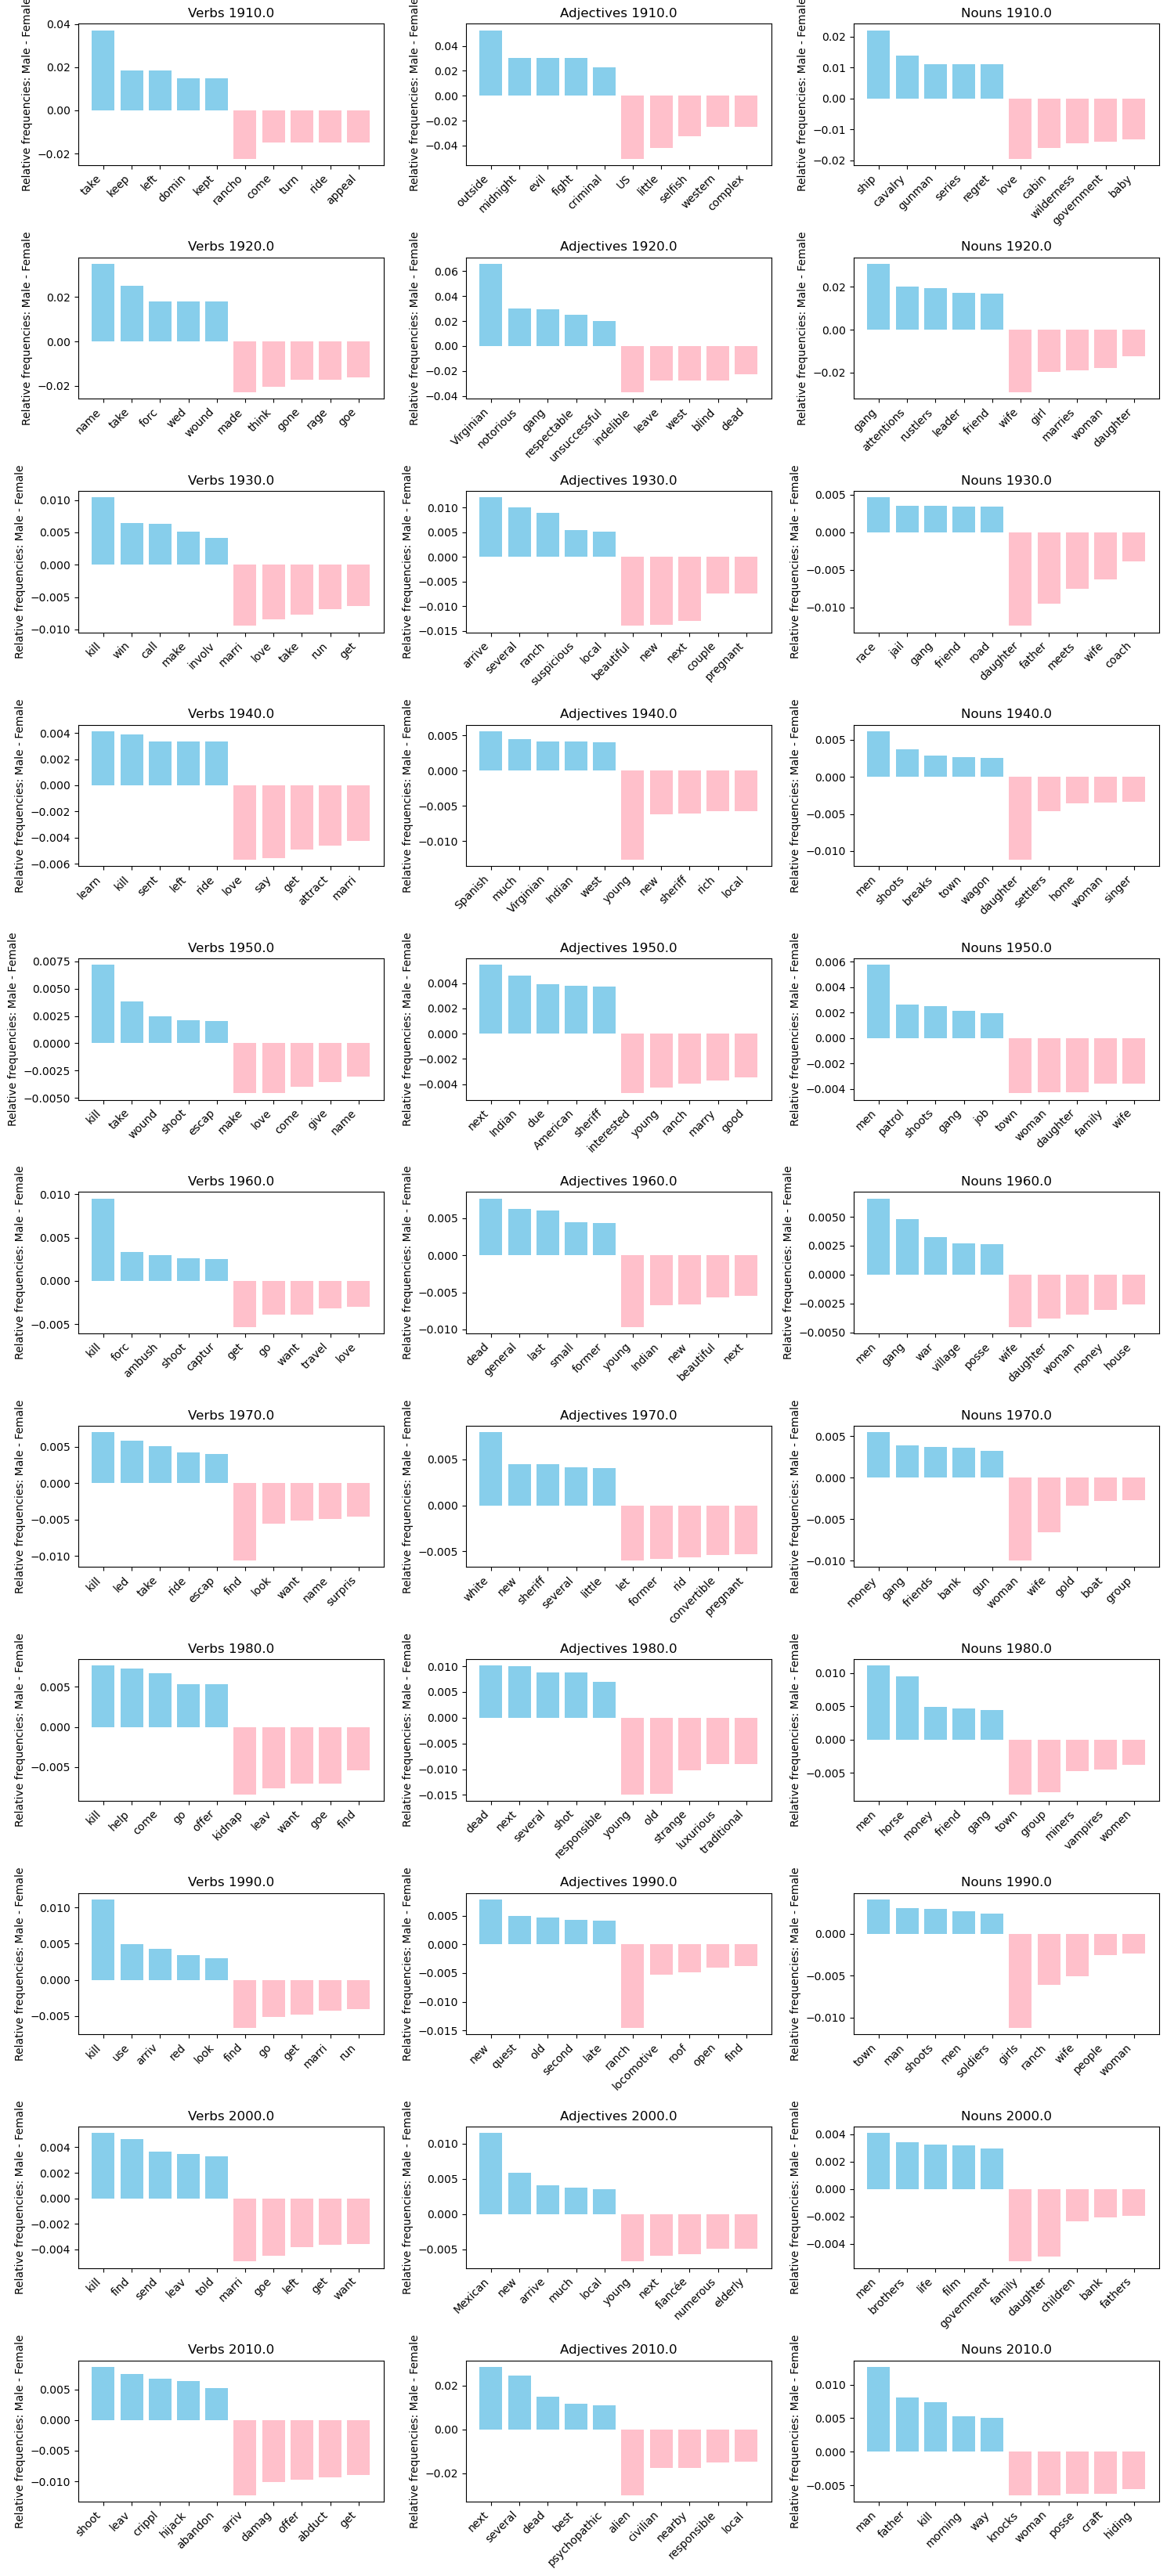

In [35]:
relative_frequencies_genre, unique_male_genre, unique_female_genre = subtract_frequencies_bis(male_frequencies_per_decade_genre, female_frequencies_per_decade_genre)
plot_rel_freq_per_decade(relative_frequencies_genre, ['Verbs', 'Adjectives', 'Nouns'])

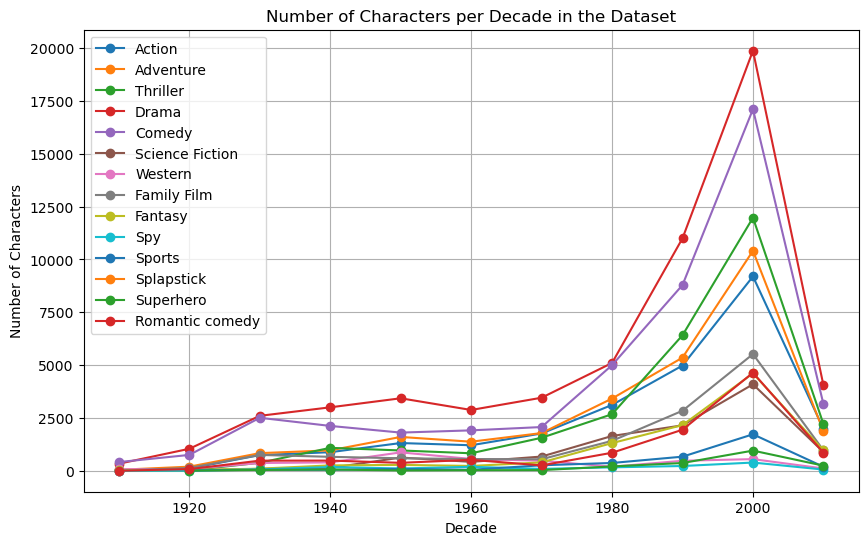

In [71]:
genres_to_analyze = ['Action', 'Adventure', 'Thriller', 'Drama', 'Comedy', 'Science Fiction', 'Western', 'Family Film', 'Fantasy', 'Spy', 'Sports', 'Splapstick', 'Superhero', 'Romantic comedy']
#genres_to_analyze = ['Splapstick']


# Create an empty dictionary to store data for each genre
genre_data = {}

# Iterate through genres
for genre in genres_to_analyze:
    genre_df = final_personas_df[final_personas_df['genre'].str.len() > 0]
    genre_df = genre_df[genre_df['genre'].apply(lambda x: genre in x)]

    # Group the movies by decade
    genres_by_decade = genre_df.groupby(genre_df['decade'])
    count_per_decade = genres_by_decade.size()  # Number of characters per decade

    # Store data for each genre in the dictionary
    genre_data[genre] = count_per_decade

# Plot all genres on the same plot
plt.figure(figsize=(10, 6))
for genre, data in genre_data.items():
    data.plot(kind='line', marker='o', label=genre)

plt.title('Number of Characters per Decade in the Dataset')
plt.xlabel('Decade')
plt.ylabel('Number of Characters')
plt.legend()
plt.grid(True)
plt.show()


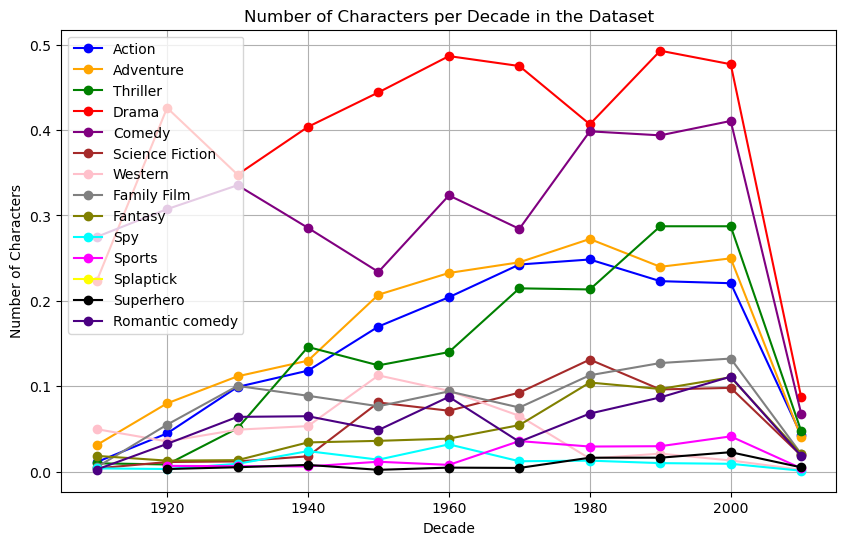

In [72]:
import matplotlib.pyplot as plt

genres_to_analyze = ['Action', 'Adventure', 'Thriller', 'Drama', 'Comedy', 'Science Fiction', 'Western', 'Family Film', 'Fantasy', 'Spy', 'Sports', 'Splaptick', 'Superhero', 'Romantic comedy']

# Define your own list of colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'indigo']

# Create an empty dictionary to store data for each genre
genre_data = {}

# Iterate through genres
for i, genre in enumerate(genres_to_analyze):
    genre_df = final_personas_df[final_personas_df['genre'].str.len() > 0]
    genre_df = genre_df[genre_df['genre'].apply(lambda x: genre in x)]

    # Group the movies by decade
    genres_by_decade = genre_df.groupby(genre_df['decade'])
    personas_by_decade = final_personas_df.groupby(final_personas_df['decade'])    
    # normalize by the number of character per decade
    count_per_decade_genre = genres_by_decade.size()  # Number of characters per decade
    count_per_decade = personas_by_decade.size()
    # Store data for each genre in the dictionary
    genre_data[genre] = count_per_decade_genre/count_per_decade

# Plot all genres on the same plot with manually specified colors
plt.figure(figsize=(10, 6))
for i, (genre, data) in enumerate(genre_data.items()):
    color = colors[i]
    data.plot(kind='line', marker='o', label=genre, color=color)

plt.title('Number of Characters per Decade in the Dataset')
plt.xlabel('Decade')
plt.ylabel('Number of Characters')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
for genre, data in genre_data.items():
    genre_data[genre] = data.dropna()
genre_data

{'Action': decade
 1910.0    0.011318
 1920.0    0.044971
 1930.0    0.099332
 1940.0    0.118414
 1950.0    0.170031
 1960.0    0.204327
 1970.0    0.242620
 1980.0    0.248506
 1990.0    0.223158
 2000.0    0.220729
 2010.0    0.042807
 dtype: float64,
 'Adventure': decade
 1910.0    0.031292
 1920.0    0.080131
 1930.0    0.111765
 1940.0    0.130108
 1950.0    0.207298
 1960.0    0.232719
 1970.0    0.245229
 1980.0    0.272495
 1990.0    0.239955
 2000.0    0.249838
 2010.0    0.040328
 dtype: float64,
 'Thriller': decade
 1910.0    0.009987
 1920.0    0.008585
 1930.0    0.050936
 1940.0    0.146102
 1950.0    0.124612
 1960.0    0.140105
 1970.0    0.214747
 1980.0    0.213437
 1990.0    0.287391
 2000.0    0.287394
 2010.0    0.047743
 dtype: float64,
 'Drama': decade
 1910.0    0.223036
 1920.0    0.426002
 1930.0    0.347861
 1940.0    0.403763
 1950.0    0.444099
 1960.0    0.486564
 1970.0    0.474942
 1980.0    0.406790
 1990.0    0.492856
 2000.0    0.477046
 2010.0    0.

In [95]:
# Filter out genres with at least a decade with values less than 0.05
threshold = 0.05
genres_to_remove = []

for genre, values in genre_data.items():
    if (values < threshold).any():
        genres_to_remove.append(genre)

# Now, remove the genres that meet the criteria
for genre in genres_to_remove:
    del genre_data[genre]


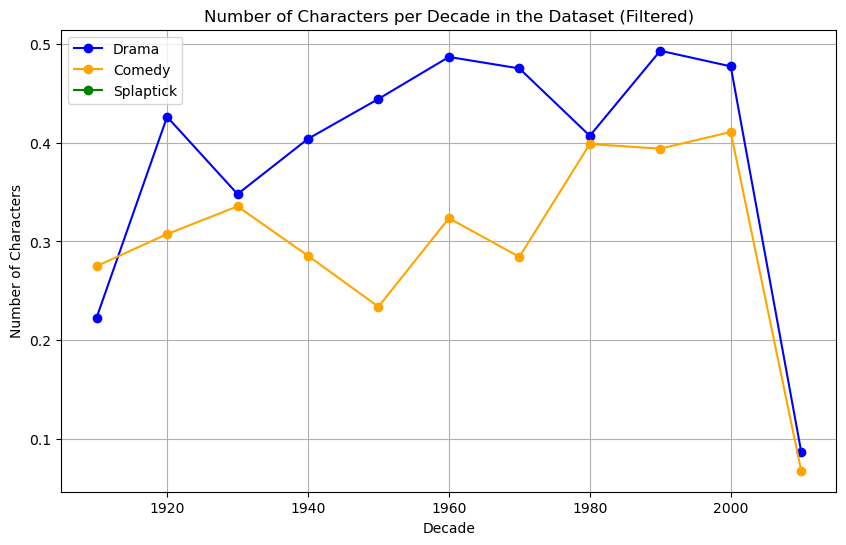

In [96]:
# Plot the filtered genres on the same plot with manually specified colors
plt.figure(figsize=(10, 6))
for i, (genre, data) in enumerate(genre_data.items()):
    color = colors[i]
    data.plot(kind='line', marker='o', label=genre, color=color)

plt.title('Number of Characters per Decade in the Dataset (Filtered)')
plt.xlabel('Decade')
plt.ylabel('Number of Characters')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
genre_data['Adventure'][1910]

0.031291611185086554

In [93]:
genre_data.items()

dict_items([('Adventure', decade
1910.0    0.031292
1920.0    0.080131
1930.0    0.111765
1940.0    0.130108
1950.0    0.207298
1960.0    0.232719
1970.0    0.245229
1980.0    0.272495
1990.0    0.239955
2000.0    0.249838
2010.0    0.040328
dtype: float64), ('Drama', decade
1910.0    0.223036
1920.0    0.426002
1930.0    0.347861
1940.0    0.403763
1950.0    0.444099
1960.0    0.486564
1970.0    0.474942
1980.0    0.406790
1990.0    0.492856
2000.0    0.477046
2010.0    0.087339
dtype: float64), ('Comedy', decade
1910.0    0.274967
1920.0    0.307441
1930.0    0.335428
1940.0    0.285484
1950.0    0.233954
1960.0    0.323475
1970.0    0.284361
1980.0    0.398502
1990.0    0.393819
2000.0    0.410645
2010.0    0.068069
dtype: float64), ('Splaptick', Series([], dtype: float64))])